In [105]:
from IPython.display import display, Markdown, Latex

from analyse import deviation
from product import Option
from strategy import *
from euronext import Page, Ticker
from graph import Graph

p = Page(ticker=Ticker.CAC1PX, params='Class_type=0&Class_symbol=&Class_exchange=&ex=&ps=999&md=12-2018')
p.fetch()
(call, put) = p.scrap_options(multiplier=10)
var = deviation(close=5012.66, volatility=17.33, period=3, precision=0)
var = deviation(close=5012.66, volatility=17.33, period=3, precision=0)  # mardi à la cloture
var = deviation(close=4963, volatility=18.58, period=3, precision=0)  # mercredi à l'ouverture
var = deviation(close=4849, volatility=22, period=2, precision=0)  # mercredi à l'ouverture
var = deviation(close=4813, volatility=24, period=1, precision=0)  # mercredi à l'ouverture
print('{}'.format(var))
sd = [var['1']['min'], var['1']['max']]
print('Variation : {}'.format(var['1']))
g=Graph(var['2']['min'], var['2']['max'], 1, sd)

{'1': {'min': 4740.0, 'max': 4886.0}, '2': {'min': 4667.0, 'max': 4959.0}, 'sd': 73.0}
Variation : {'min': 4740.0, 'max': 4886.0}


In [ ]:

s = Strategy('S47-CAC40-straddle').add(put[4900], 'short', 2).add(call[5075], 'short', 2)
g.profit(s, 'long')
g.display_summary(s)
print('pv-max: {} €'.format(max(s.payoff(g.sT, 'long'))))

s = Strategy('S47-CAC40-straddle').add(put[4925], 'short', 1).add(call[5050], 'short', 1)
g.profit(s, 'long')
g.display_summary(s)
print('pv-max: {} €'.format(max(s.payoff(g.sT, 'long'))))

b11 = Strategy('S47-CAC40-butterfly11').add(put[5000], 'short', 1).add(call[5000], 'short', 1)
b12 = Strategy('S47-CAC40-butterfly12').add(put[5000], 'short', 1).add(call[5000], 'short', 2)
b21 = Strategy('S47-CAC40-butterfly21').add(put[5000], 'short', 2).add(call[5000], 'short', 1)
g.profit(b11, 'long')
g.display_summary(b11)
print('pv-max: {} €'.format(max(b11.payoff(g.sT, 'long'))))
g.profit(b12, 'long')
g.display_summary(b12)
print('pv-max: {} €'.format(max(b12.payoff(g.sT, 'long'))))
g.profit(b21, 'long')
g.display_summary(b21)
print('pv-max: {} €'.format(max(b21.payoff(g.sT, 'long'))))


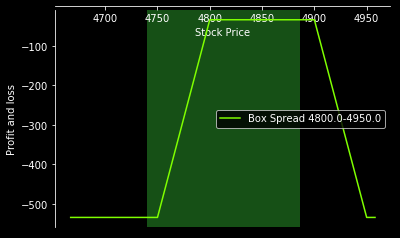

Cost-BoxSpread : 1034.00€


Category,strike,direction,Quantity,Cost,Premium
Call,4800,short,1,-457,-45.7
Call,4750,long,1,960,96
Put,4900,short,1,-595,-59.5
Put,4950,long,1,1126,112.6


In [68]:
bspread = BoxSpread(call[4800], call[4750], put[4900], put[4950])
g.profit_strategy(bspread)
print('Cost-BoxSpread : {:0.02f}€'.format(bspread.cost()))
g.display_summary(bspread)

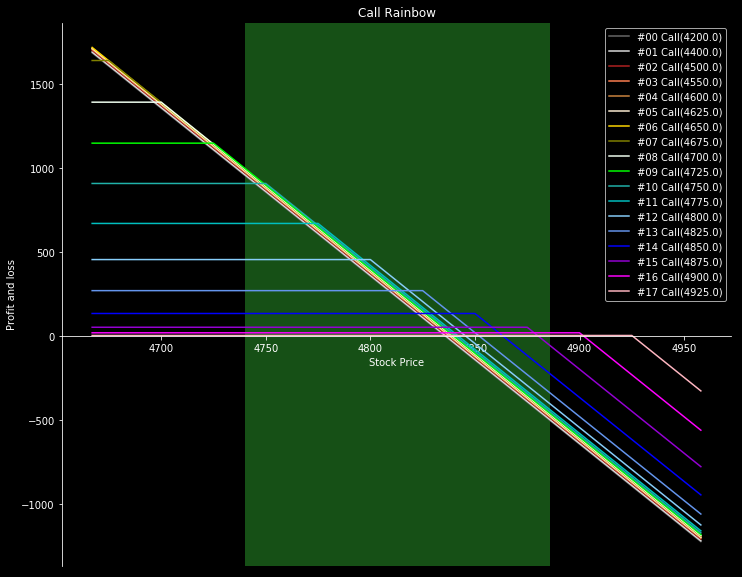

In [69]:
g.profit_rainbow(call.values(), 'short', title='Call Rainbow')

In [ ]:
from analyse import pivot_sr

H = 5140.45
B = 4986.19
C = 5025.20
for k, v in pivot_sr(H, B, C).items():
    print('{} {}'.format(k,v))

### Semaine 46 : 19 nov au 23 nov
- 1 $\sigma$ [4875 - 5175]
- 2 $\sigma$ [4750 - 5300]
- Pivot 5050
- SR1 [4960 - 5115]
- SR2 [4896 - 5204]
- SR3 [4806 - 5269]

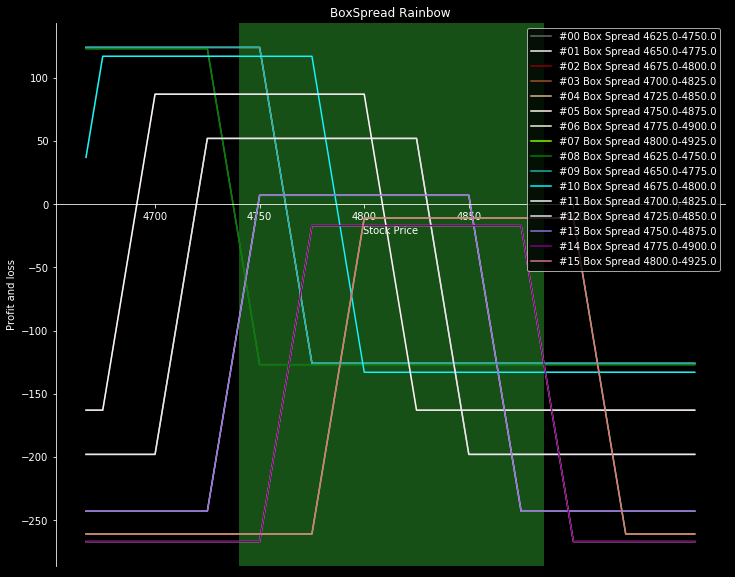

In [70]:
bss = BoxSpread.explorator(call.values(), put.values(), spread=50, gap=100)
g.profit_rainbow(bss, 'long', title='BoxSpread Rainbow')

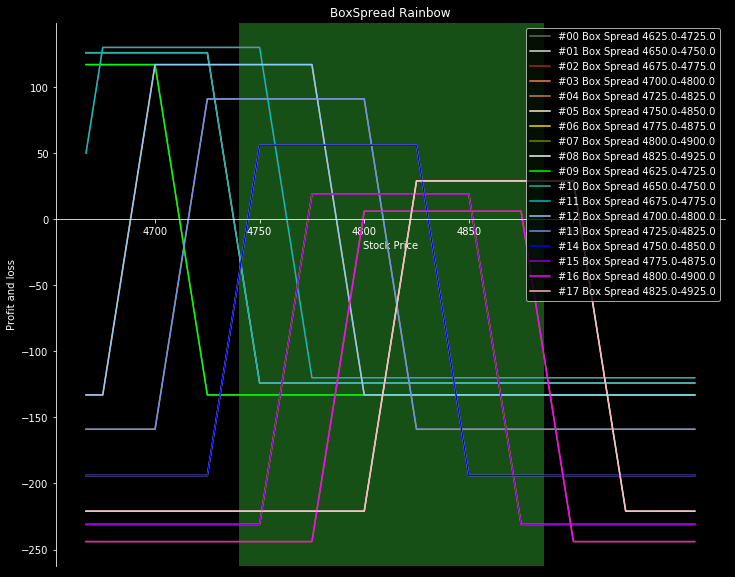

In [76]:
bss = BoxSpread.explorator(call.values(), put.values(), spread=50, gap=75)
g.profit_rainbow(bss, 'long', title='BoxSpread Rainbow')

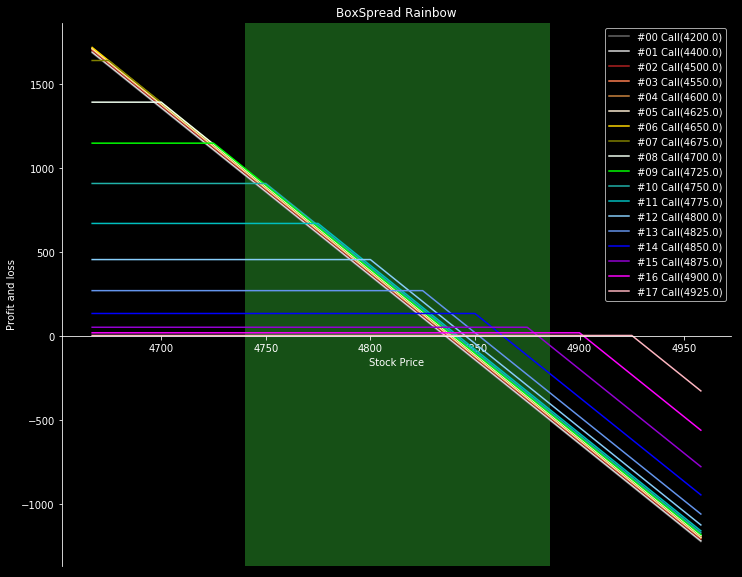

In [78]:
g.profit_rainbow(call.values(), 'short', title='BoxSpread Rainbow')

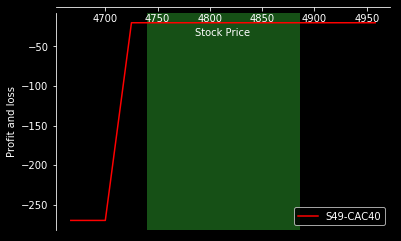

Category,strike,direction,Quantity,Cost,Premium
Put,4625,long,1,15,1.5
Put,4600,short,1,-3,-0.3
Put,4700,long,1,21,2.1
Put,4725,short,1,-13,-1.3


pv-max: -20.0 €
pv-min: -270.0 €


In [85]:
s = (Strategy('S49-CAC40')
     #.add(Option(cat='Call', strike=5075, vente=2.8, multiplier=10), 'short', 1)
     #.add(Option(cat='Call', strike=5050, achat=0.5, multiplier=10), 'long', 1)
     .add(put[4625], 'long', 1)
     .add(put[4600], 'short', 1)
     .add(put[4700], 'long', 1)
     .add(put[4725], 'short', 1)
    )
#s = bss[9]
g.profit(s, 'long')
g.display_summary(s)
print('pv-max: {} €'.format(max(s.payoff(g.sT, 'long'))))
print('pv-min: {} €'.format(min(s.payoff(g.sT, 'long'))))


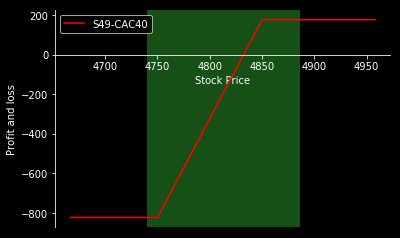

Category,strike,direction,Quantity,Cost,Premium
Call,4850,short,1,-136,-13.6
Call,4750,long,1,960,96


pv-max: 176.0 €
pv-min: -824.0 €


In [104]:
s = (Strategy('S49-CAC40')
     .add(call[4850], 'short', 1)
     .add(call[4750], 'long', 1)
     #.add(call[4900], 'short', 1)
     #.add(call[4925], 'long', 1)
     #.add(Option(cat='Call', strike=5075, vente=2.8, multiplier=10), 'short', 1)
     #.add(Option(cat='Call', strike=5050, achat=0.5, multiplier=10), 'long', 1)
     #.add(call[5050], 'long', 1)
    )
g.profit(s, 'long')
g.display_summary(s)
print('pv-max: {} €'.format(max(s.payoff(g.sT, 'long'))))
print('pv-min: {} €'.format(min(s.payoff(g.sT, 'long'))))

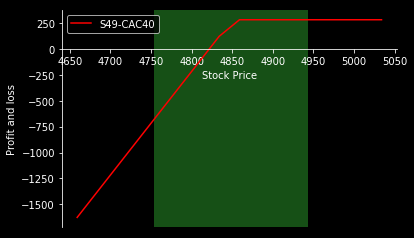

Category,strike,direction,Quantity,Cost,Premium
Put,4850,short,1,-283,-28.3


pv-max: 283.0 €
pv-min: -1627.0 €
4754.0 -> -677.0
4944.0 -> 283.0


In [41]:
s = (Strategy('S49-CAC40')
     #.add(call[4900], 'long', 1)
     #.add(put[4850], 'short', 1)
     .add(put[4850], 'short', 1)
     #.add(call[4900], 'short', 1)
     #.add(put[4900], 'long', 1)
     #.add(call[5050], 'long', 1)
     #.add(Option(cat='Call', strike=5075, vente=2.8, multiplier=10), 'short', 1)
     #.add(Option(cat='Call', strike=5050, achat=0.5, multiplier=10), 'long', 1)
     #.add(call[5050], 'long', 1)
    )
g.profit(s, 'long')
g.display_summary(s)
print('pv-max: {} €'.format(max(s.payoff(g.sT, 'long'))))
print('pv-min: {} €'.format(min(s.payoff(g.sT, 'long'))))
import numpy as np
v = s.payoff(np.array(g.sdeviation), 'long')

for s, pv in zip(g.sdeviation, v):
    print('{} -> {}'.format(s, pv))

In [ ]:
s = (Strategy('S49-CAC40')
     #.add(call[4900], 'long', 1)
     #.add(put[4850], 'short', 1)
     .add(put[4850], 'short', 1)
     #.add(call[4900], 'short', 1)
     #.add(put[4900], 'long', 1)
     #.add(call[5050], 'long', 1)
     #.add(Option(cat='Call', strike=5075, vente=2.8, multiplier=10), 'short', 1)
     #.add(Option(cat='Call', strike=5050, achat=0.5, multiplier=10), 'long', 1)
     #.add(call[5050], 'long', 1)
    )
g.profit(s, 'long')
g.display_summary(s)
print('pv-max: {} €'.format(max(s.payoff(g.sT, 'long'))))
print('pv-min: {} €'.format(min(s.payoff(g.sT, 'long'))))
import numpy as np
v = s.payoff(np.array(g.sdeviation), 'long')

for s, pv in zip(g.sdeviation, v):
    print('{} -> {}'.format(s, pv))

In [19]:
deviation(close=4963, volatility=22, period=3, precision=0)

{'1': {'min': 4844.0, 'max': 5082.0},
 '2': {'min': 4725.0, 'max': 5201.0},
 'sd': 119.0}

In [23]:
p2 = Page(ticker=Ticker.CAC1PX, params='Class_type=0&Class_symbol=&Class_exchange=&ex=&ps=999&md=12-2018')
p2.fetch()
(call2, put2) = p2.scrap_options(multiplier=10)
(call2, put2)

({}, {})

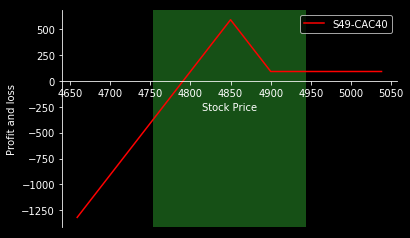

Category,strike,direction,Quantity,Cost,Premium
Put,4900,long,1,867,86.7
Put,4850,short,2,-958,-47.9


pv-max: 591.0 €
pv-min: -1319.0 €
4754.0 -> -369.0
4944.0 -> 91.0


In [62]:
# Buy 1 ITM Call
# Sell 2 ATM Calls


# Buy 1 ITM Put
# Sell 2 ATM Puts
s = (Strategy('S49-CAC40')
     .add(put[4900], 'long', 1)
     .add(put[4850], 'short', 2)
    )
g.profit(s, 'long')
g.display_summary(s)
print('pv-max: {} €'.format(max(s.payoff(g.sT, 'long'))))
print('pv-min: {} €'.format(min(s.payoff(g.sT, 'long'))))
import numpy as np
v = s.payoff(np.array(g.sdeviation), 'long')

for s, pv in zip(g.sdeviation, v):
    print('{} -> {}'.format(s, pv))